# Word to Vector(word2vec)

> ## Embedding

# I. 말뭉치(Corpus) 생성

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* 말뭉치 List

In [20]:
corpus = ['예쁨 강함 정직', 
          '탐욕 이기주의 부정', 
          '성실 젊음 정직',
          '멋짐 젊음 트렌디',
          '멋짐 젊음 예쁨',
          '젊음 트렌디',
          '정직 강함', 
          '이기주의 표독',
          '멋짐 강함 예쁨',
          '부정 이기주의 표독']

In [21]:
for text in corpus:
    print(text)

예쁨 강함 정직
탐욕 이기주의 부정
성실 젊음 정직
멋짐 젊음 트렌디
멋짐 젊음 예쁨
젊음 트렌디
정직 강함
이기주의 표독
멋짐 강함 예쁨
부정 이기주의 표독


# II. 'DATA' List 생성

* Before Split

In [22]:
corpus[0]

'예쁨 강함 정직'

* Split

In [23]:
sentences = []

for sentence in corpus:
    sentences.append(sentence.split(' '))
    
WINDOW_SIZE = 2

DATA = []

for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0):min(idx + WINDOW_SIZE, len(sentence)) + 1]: 
            if neighbor != word:
                DATA.append([word, neighbor])


* After Split

In [24]:
DATA[:6]

[['예쁨', '강함'],
 ['예쁨', '정직'],
 ['강함', '예쁨'],
 ['강함', '정직'],
 ['정직', '예쁨'],
 ['정직', '강함']]

# III. 'DF' DataFrame 생성

> ## 1) pd.DataFrame( )

In [44]:
import pandas as pd

DF = pd.DataFrame(DATA, columns = ['INPUT', 'LABEL'])

DF.head(5)

,INPUT,LABEL
0,예쁨,강함
1,예쁨,정직
2,강함,예쁨
3,강함,정직
4,정직,예쁨


> ## 2) 'X_test' & 'X_label' 지정

* 'X_test' - 한글

In [45]:
X_test = DF.INPUT.unique()

print(X_test)

['예쁨' '강함' '정직' '탐욕' '이기주의' '부정' '성실' '젊음' '멋짐' '트렌디' '표독']


* 'X_label' - 영어

In [46]:
X_label = ['Pretty', 'Strong', 'Honesty', 'Greedy', 'Selfish', 'Unjustifiable', 'Diligent', 'Young', 'Handsome', 'Trendy', 'Ferocity']

print(X_label)

['Pretty', 'Strong', 'Honesty', 'Greedy', 'Selfish', 'Unjustifiable', 'Diligent', 'Young', 'Handsome', 'Trendy', 'Ferocity']


> ## 3) String to Integer

* 'DF' DataFrame

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

DF.INPUT = encoder.fit_transform(DF.INPUT)
DF.LABEL = encoder.fit_transform(DF.LABEL)

In [48]:
DF.head()

,INPUT,LABEL
0,4,0
1,4,7
2,0,4
3,0,7
4,7,4


> ## 4) One-Hot-Encoding

* 'X_train' and 'y_train'

In [49]:
from tensorflow.keras.utils import to_categorical

X_train = to_categorical(DF.INPUT.values)
y_train = to_categorical(DF.LABEL.values)

In [50]:
print(X_train[0], y_train[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


* Shape

In [51]:
print(X_train.shape, y_train.shape)

(48, 11) (48, 11)


# IV. Embedding

> ## 1) Model 'autoencoder' Define

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers

encoding_dim = 2

input_txt = layers.Input(shape = (11, ))
encoded = layers.Dense(16, activation = 'relu')(input_txt)
encoded = layers.Dense(encoding_dim, activation = 'relu')(encoded)
decoded = layers.Dense(16, activation = 'relu')(encoded)
decoded = layers.Dense(11, activation = 'sigmoid')(decoded)
autoencoder = models.Model(input_txt, decoded)

* Model Information

In [53]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_8 (Dense)             (None, 16)                192       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
 dense_10 (Dense)            (None, 16)                48        
                                                                 
 dense_11 (Dense)            (None, 11)                187       
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model 'word2vec' Define

In [54]:
word2vec = models.Model(input_txt, encoded)

* Model Information

In [55]:

word2vec.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_8 (Dense)             (None, 16)                192       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

In [56]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

> ## 4) Model fit

* 약 2분

In [57]:
%%time

autoencoder.fit(X_train, y_train,
                epochs = 2000,
                batch_size = 2,
                verbose = 0)

CPU times: user 1min 19s, sys: 4.09 s, total: 1min 23s
Wall time: 1min 12s


# V. 'word2vec' 적용

> ## 1) 'X_test' Integer Encoding

In [58]:
print(X_test)

['예쁨' '강함' '정직' '탐욕' '이기주의' '부정' '성실' '젊음' '멋짐' '트렌디' '표독']


In [59]:
X_test = encoder.fit_transform(X_test)

In [60]:
print(X_test)

[ 4  0  7  8  5  2  3  6  1  9 10]


> ## 2) 'X_test' One-Hot-Encoding

In [61]:
from tensorflow.keras.utils import to_categorical

X_test = to_categorical(X_test)

In [62]:
print(X_test)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 3) 'word2vec' Embedding

> ### (1) Embedding 적용

In [63]:
embedding_txt = word2vec.predict(X_test, verbose = 0)

embedding_txt.shape

(11, 2)

> ### (2) Embedding 결과

In [64]:
embedding_txt

array([[ 3.1691465 ,  8.371287  ],
       [ 5.607998  ,  5.938164  ],
       [ 0.42031693,  6.120148  ],
       [ 2.8501205 ,  2.570074  ],
       [ 3.6324291 ,  0.        ],
       [ 4.932553  ,  1.770607  ],
       [ 9.496043  , 22.884686  ],
       [ 0.        ,  0.70566964],
       [ 0.        ,  8.835408  ],
       [ 5.5034924 , 15.97926   ],
       [ 2.932138  ,  2.1993291 ]], dtype=float32)

> ### (3) 'word2vec_DF' DataFrame

In [65]:
word2vec_DF = pd.DataFrame(embedding_txt, columns = ['x1', 'x2'])
word2vec_DF['word'] = X_label #np.array(list(word2int.keys()))
word2vec_DF = word2vec_DF[['word', 'x1', 'x2']]

word2vec_DF

,word,x1,x2
0,Pretty,3.169147,8.371287
1,Strong,5.607998,5.938164
2,Honesty,0.420317,6.120148
3,Greedy,2.850121,2.570074
4,Selfish,3.632429,0.000000
5,Unjustifiable,4.932553,1.770607
6,Diligent,9.496043,22.884686
7,Young,0.000000,0.705670
8,Handsome,0.000000,8.835408
9,Trendy,5.503492,15.979260


> ### (4) Visualization

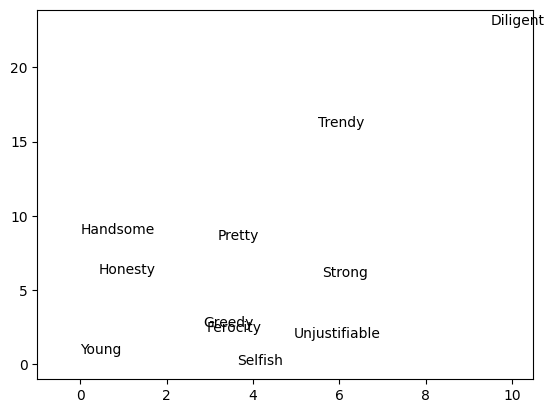

In [66]:
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

fig, ax = plt.subplots()

for word, x1, x2 in zip(word2vec_DF['word'], 
                        word2vec_DF['x1'], 
                        word2vec_DF['x2']):
    ax.annotate(word, (x1, x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(embedding_txt, axis=0)[0] - PADDING
y_axis_min = np.amin(embedding_txt, axis=0)[1] - PADDING
x_axis_max = np.amax(embedding_txt, axis=0)[0] + PADDING
y_axis_max = np.amax(embedding_txt, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (7, 7)

plt.show()

# 
# 
# 
# The End
# 
# 
# 